# **NDCs Analysis.** Figures

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import re
import csv
import geopandas as gpd
import plotly.express as px
import plotly.io as pio

In [92]:
ndcs = pd.read_excel('../ndcs_clean.xlsx')

## Binary variables

In [5]:
counts_dict = {}

var_binary = ['policy_education_social', 'policy_education_primsec', 'policy_education_university',  'policy_justtransition_abstract',
        'policy_justtransition_macro', 'policy_justtransition_industry', 'policy_justtransition_TVET',
        'policy_justtransition_skill', 'policy_justtransition_health', 
        'policy_justtransition_labor',  'policy_justtransition_socidialogue']

# Iterate over each column of compared results
for col in var_binary:
    # Count the occurrences of True and False values in the column
    counts = ndcs[col].value_counts(normalize=True)
    
    # Store the counts in the dictionary
    counts_dict[col] = counts

# Create a DataFrame from the dictionary
counts_df = pd.DataFrame(counts_dict)
counts_df *= 100

In [6]:
counts_df.head(3)

,policy_education_social,policy_education_primsec,policy_education_university,policy_justtransition_abstract,policy_justtransition_macro,policy_justtransition_industry,policy_justtransition_TVET,policy_justtransition_skill,policy_justtransition_health,policy_justtransition_labor,policy_justtransition_socidialogue
no,23.589744,81.538462,84.102564,38.659794,10.25641,10.769231,94.329897,49.74359,91.237113,70.103093,82.564103
yes,76.410256,18.461538,15.897436,61.340206,89.74359,89.230769,5.670103,50.25641,8.762887,29.896907,17.435897


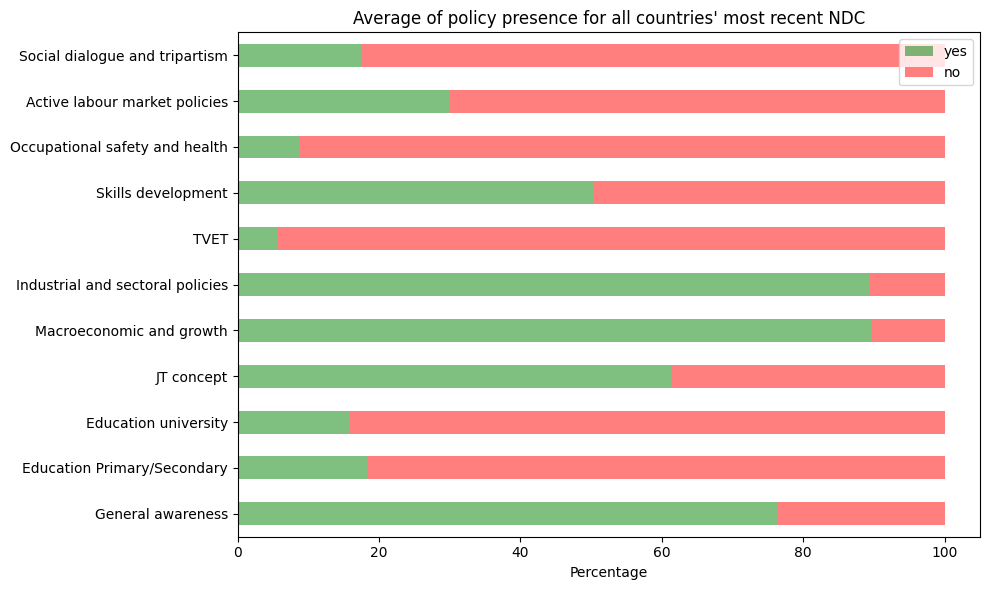

In [7]:
counts_df.columns = counts_df.columns.str.replace('policy_justtransition_', '')
counts_df.columns = counts_df.columns.str.replace('policy_', '')
counts_df.rename(columns={'education_social': 'General awareness', 'education_primsec': 'Education Primary/Secondary', 'education_university': 'Education university',
                          'abstract':'JT concept', 'socidialogue': 'Social dialogue and tripartism', 'macro': 'Macroeconomic and growth',
                          'industry': 'Industrial and sectoral policies', 'skill': 'Skills development',
                          'health': 'Occupational safety and health', 'labor': 'Active labour market policies'}, inplace=True)

counts_df.to_csv('../data/proc/policy_presence_all.csv', index=True)

counts_plot = counts_df[::-1].T

ax = counts_plot.plot(kind='barh', stacked=True, figsize=(10, 6), color=['green','red', 'gray'], alpha=0.5)
ax.set_xlabel('Percentage')
ax.set_title("Average of policy presence for all countries' most recent NDC")
plt.tight_layout()
plt.legend(loc='upper right')
plt.savefig('../fig/policy_presence_all.pdf', dpi=1000)
plt.show()

### Binary variables, by regional group 
Source: [the World Bank](https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups)

In [8]:
# Initialize dictionary to store counts
counts_dict = {}

# Iterate over each value of the 'Region' column
for region, group in ndcs.groupby('Region'):
    counts_dict[region] = {}
    
    # Iterate over each column of compared results
    for col in var_binary:
        # Count the occurrences of True and False values in the column
        counts = group[col].value_counts(normalize=True).to_dict()
        
        # Store the counts in the dictionary
        counts_dict[region][col] = counts

# Create a DataFrame from the dictionary
counts_df = pd.DataFrame.from_dict({(i, j): counts_dict[i][j] for i in counts_dict.keys()  for j in counts_dict[i].keys()}, orient='index').reset_index()
counts_df.iloc[:, 2:] *= 100

In [9]:
counts_df.rename(columns={'level_0': 'region', 'level_1': 'policy'}, inplace=True)
policy_value_mapping = {
    'education_social': 'General awareness', 'education_primsec': 'Education Primary/Secondary', 'education_university': 'Education university',
    'abstract':'JT concept',
    'socidialogue': 'Social dialogue and tripartism',
    'macro': 'Macroeconomic and growth',
    'industry': 'Industrial and sectoral policies',
    'skill': 'Skills development',
    'health': 'Occupational safety and health',
    'labor': 'Active labour market policies'
}

counts_df['policy'] = counts_df['policy'].str.replace('policy_justtransition_', '', regex=False)
counts_df['policy'] = counts_df['policy'].str.replace('policy_', '', regex=False)
counts_df['policy'] = counts_df['policy'].replace(policy_value_mapping)
counts_df['policy'] = counts_df['policy'].replace(policy_value_mapping)


counts_df.to_csv('../data/proc/policy_presence_by_region.csv', index=True)

counts_df.head()

,region,policy,yes,no
0,East Asia & Pacific,General awareness,64.285714,35.714286
1,East Asia & Pacific,Education Primary/Secondary,17.857143,82.142857
2,East Asia & Pacific,Education university,10.714286,89.285714
3,East Asia & Pacific,JT concept,40.740741,59.259259
4,East Asia & Pacific,Macroeconomic and growth,85.714286,14.285714


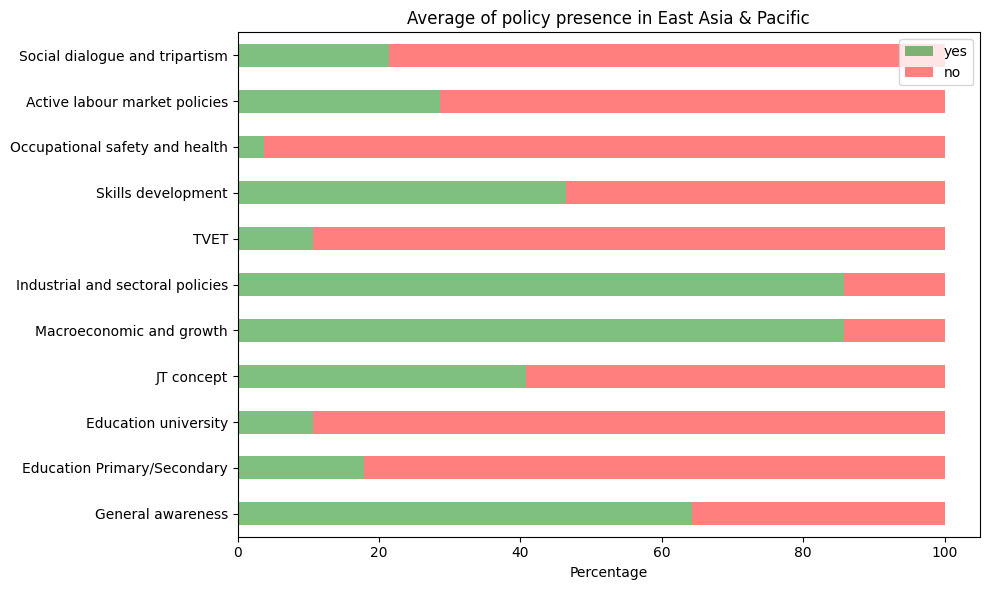

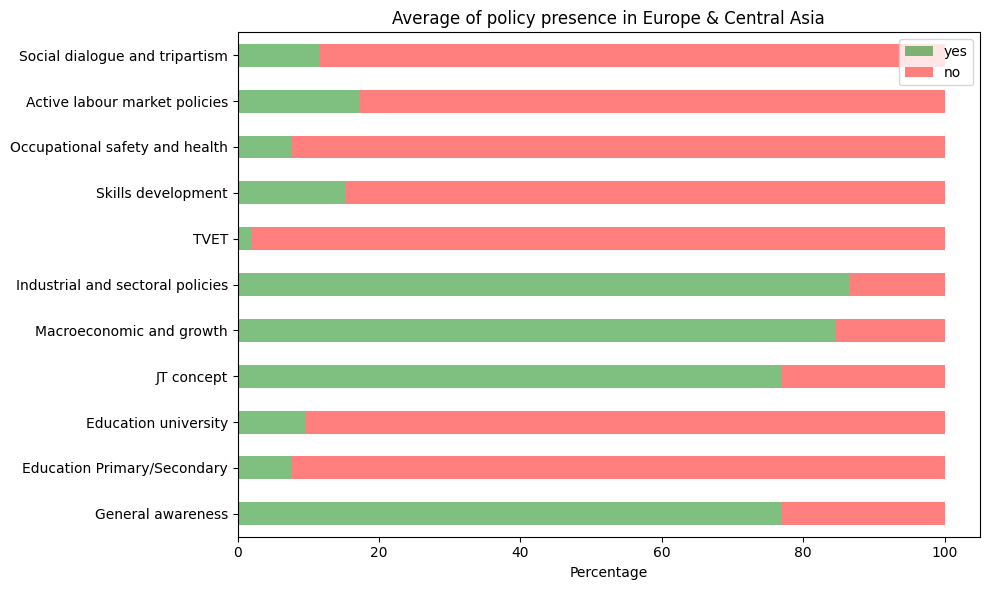

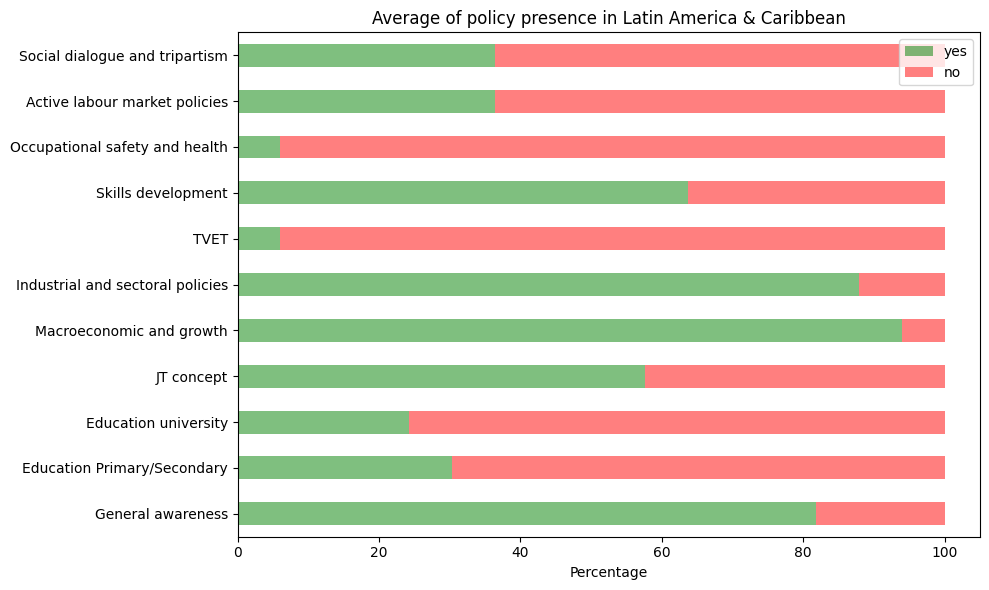

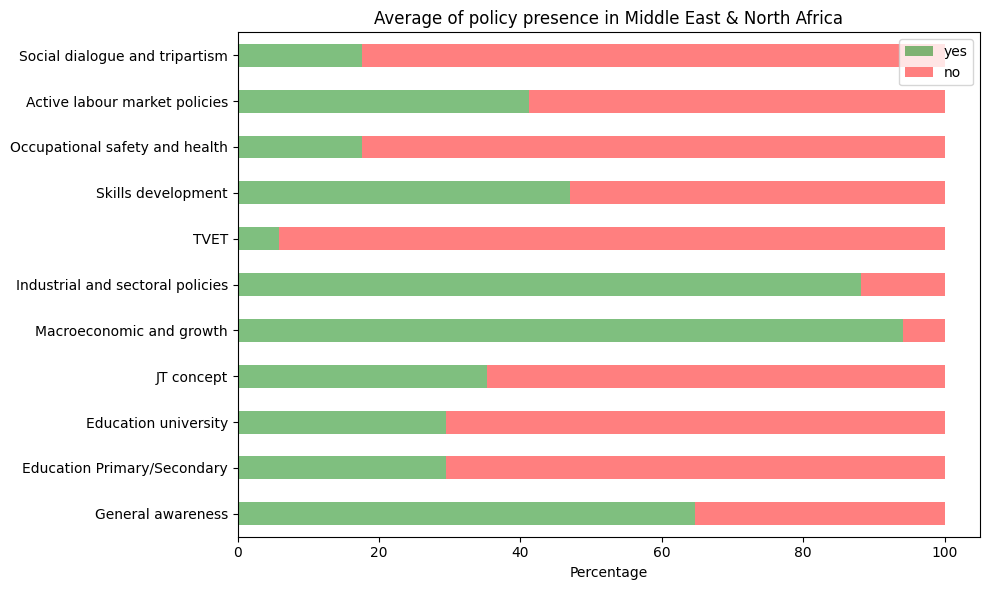

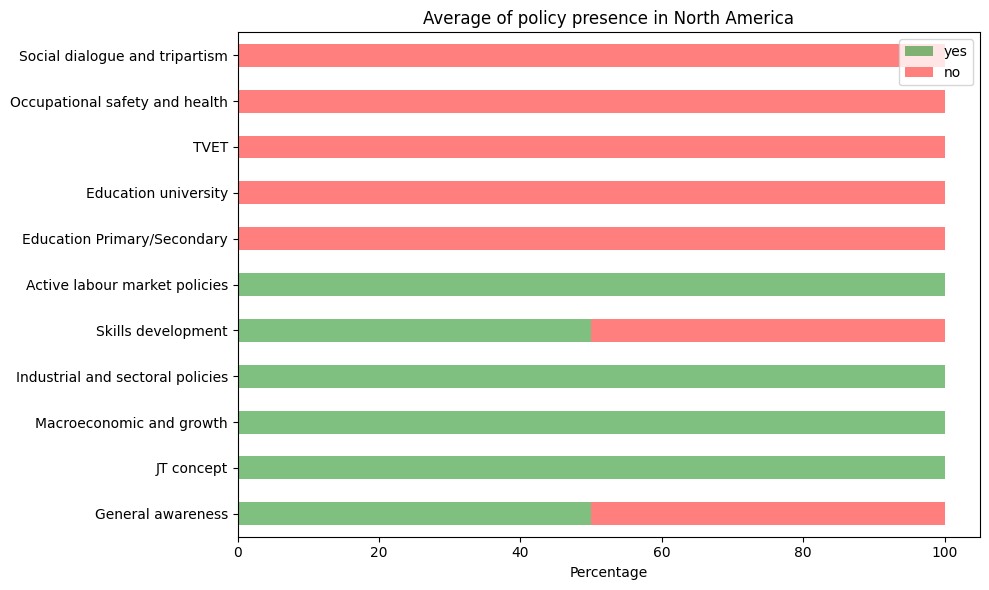

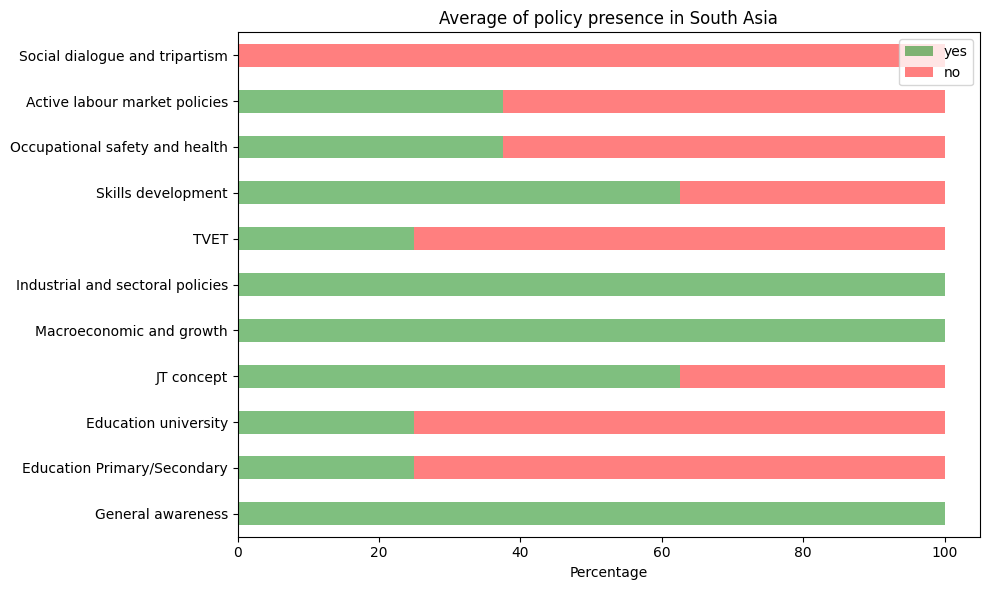

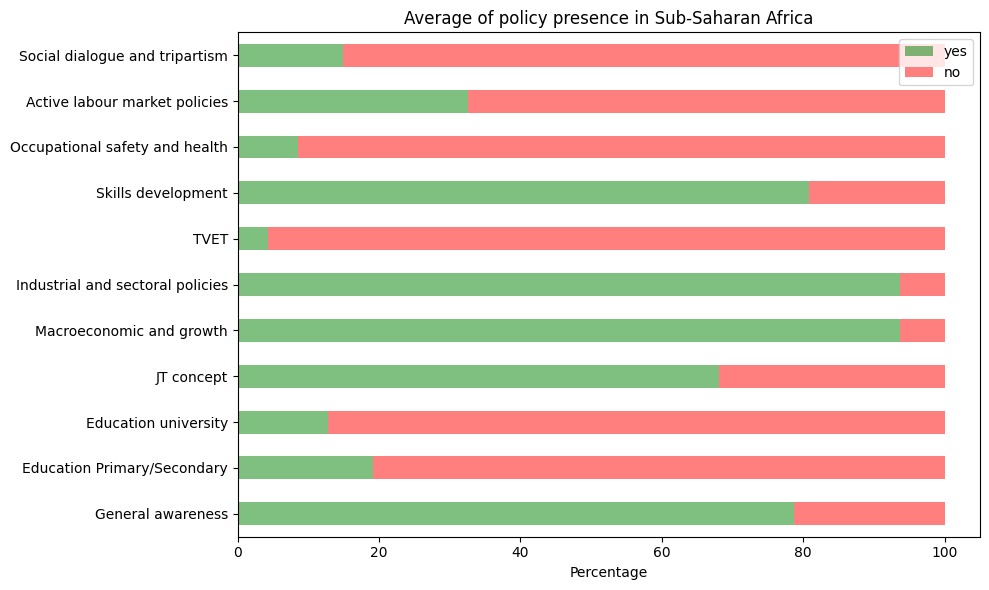

In [10]:
counts_df = counts_df.fillna(0)

for region in counts_df['region'].unique():
    # Extract data for the current country
    counts_plot = counts_df[counts_df['region'] == region].drop(columns='region')
    counts_plot = counts_plot.set_index('policy')
    
    # Plot stacked bar chart
    ax = counts_plot.plot(kind='barh', stacked=True, figsize=(10, 6), color=['green','red', 'gray'], alpha=0.5)
    ax.set_xlabel('Percentage')
    ax.set_ylabel('')
    ax.set_title(f'Average of policy presence in {region}')
    plt.tight_layout()
    plt.legend(loc='upper right')
    
    file = '../fig/policy_presence_' + region + '.pdf'
    plt.savefig(file, dpi=1000)
    
    plt.show()

### Binary variables, by income group
Source: [the World Bank](https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups)

In [11]:
# Initialize dictionary to store counts
counts_dict = {}

# Iterate over each value of the 'Region' column
for region, group in ndcs.groupby('Income group'):
    counts_dict[region] = {}
    
    # Iterate over each column of compared results
    for col in var_binary:
        # Count the occurrences of True and False values in the column
        counts = group[col].value_counts(normalize=True).to_dict()
        
        # Store the counts in the dictionary
        counts_dict[region][col] = counts

# Create a DataFrame from the dictionary
counts_df = pd.DataFrame.from_dict({(i, j): counts_dict[i][j] for i in counts_dict.keys()  for j in counts_dict[i].keys()}, orient='index').reset_index()
counts_df.iloc[:, 2:] *= 100

In [12]:
counts_df.rename(columns={'level_0': 'income group', 'level_1': 'policy'}, inplace=True)
policy_value_mapping = {
    'education_social': 'General awareness', 'education_primsec': 'Education Primary/Secondary', 'education_university': 'Education university',
    'abstract':'JT concept',
    'socidialogue': 'Social dialogue and tripartism',
    'macro': 'Macroeconomic and growth',
    'industry': 'Industrial and sectoral policies',
    'skill': 'Skills development',
    'health': 'Occupational safety and health',
    'labor': 'Active labour market policies'
}

counts_df['policy'] = counts_df['policy'].str.replace('policy_justtransition_', '', regex=False)
counts_df['policy'] = counts_df['policy'].str.replace('policy_', '', regex=False)
counts_df['policy'] = counts_df['policy'].replace(policy_value_mapping)
counts_df['policy'] = counts_df['policy'].replace(policy_value_mapping)


counts_df.to_csv('../data/proc/policy_presence_by_income_group.csv', index=True)

counts_df.head()

,income group,policy,yes,no
0,High income,General awareness,75.000000,25.000000
1,High income,Education Primary/Secondary,15.000000,85.000000
2,High income,Education university,10.000000,90.000000
3,High income,JT concept,68.333333,31.666667
4,High income,Macroeconomic and growth,90.000000,10.000000


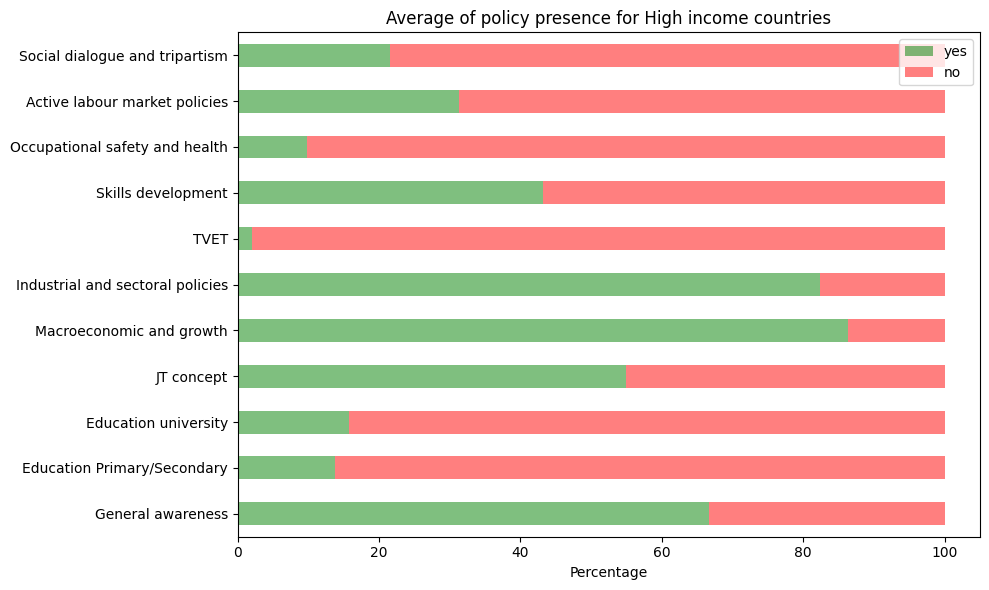

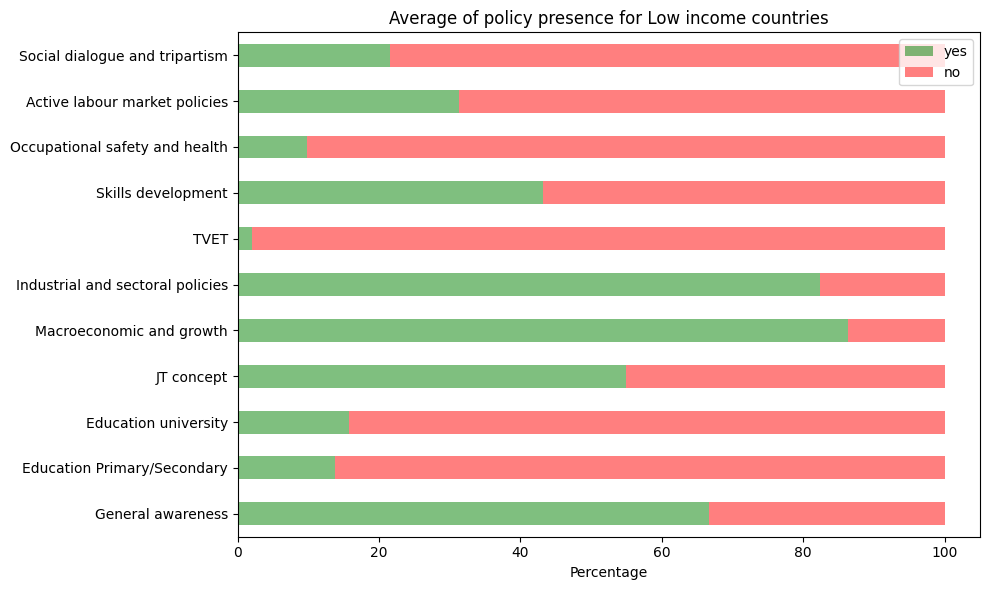

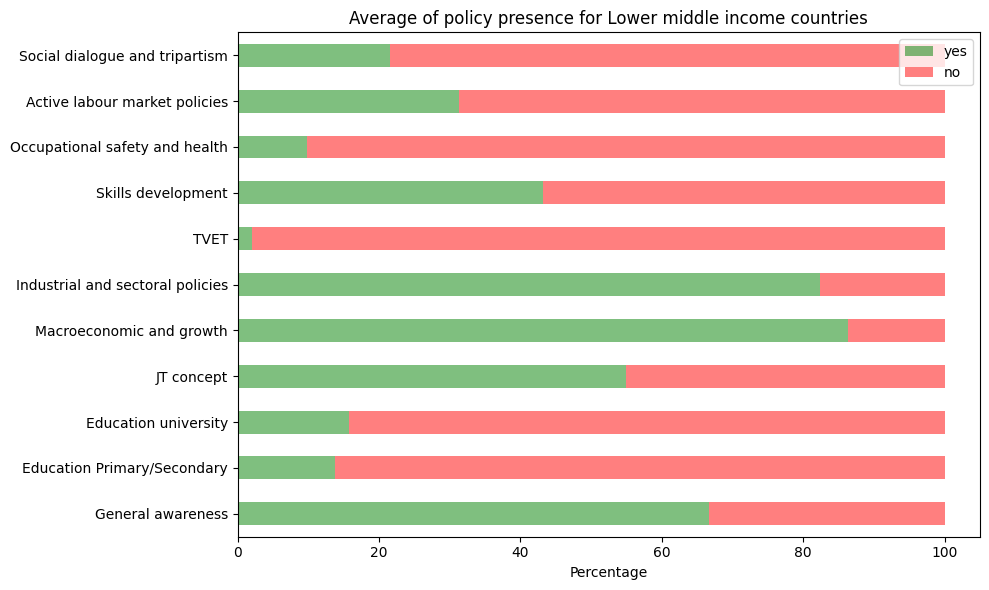

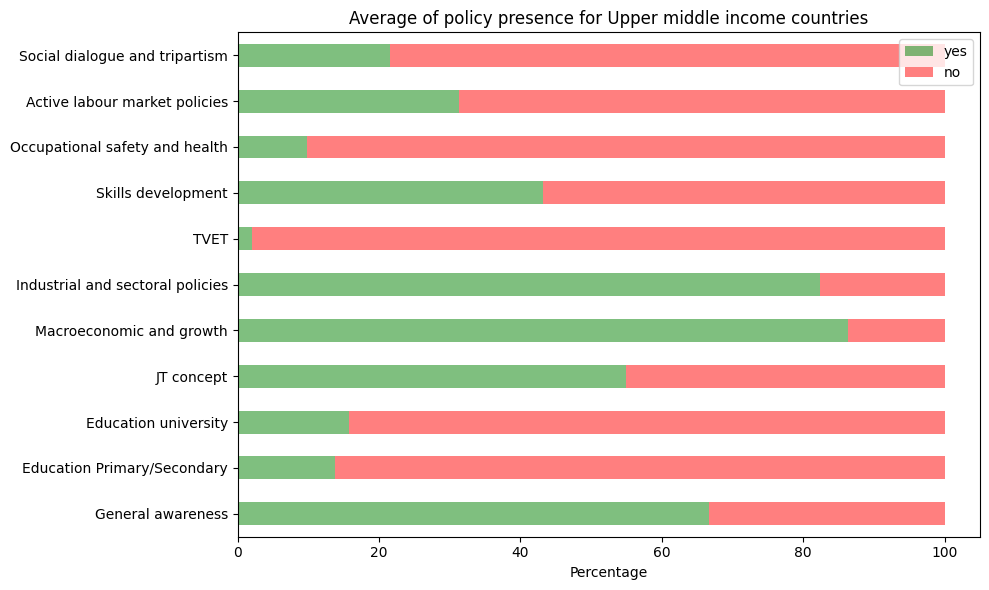

In [13]:
counts_df = counts_df.fillna(0)

for group in counts_df['income group'].unique():
    # Extract data for the current country
    counts_plot = counts_df[counts_df['income group'] == region].drop(columns='income group')
    counts_plot = counts_plot.set_index('policy')
    
    # Plot stacked bar chart
    ax = counts_plot.plot(kind='barh', stacked=True, figsize=(10, 6), color=['green','red', 'gray'], alpha=0.5)
    ax.set_xlabel('Percentage')
    ax.set_ylabel('')
    ax.set_title(f'Average of policy presence for {group} countries')
    plt.tight_layout()
    plt.legend(loc='upper right')
    
    file = '../fig/policy_presence_' + group + '.pdf'
    plt.savefig(file, dpi=1000)
    plt.show()

## JT depth

In [14]:
var_jt_depth = ['justtransition_dedicated_section', 'justtransition_follow_up', 'justtransition_finance', 'justtransition_international_cooperation']

ndcs_jt = ndcs[ndcs['total_words_justtransition']>0]
ndcs_jt['countryname'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Austria',
       'Belgium', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Croatia', 'Czechia', 'Denmark', 'Dominican Republic', 'Egypt',
       'EU', 'Finland', 'France', 'Germany', 'Greece', 'Indonesia',
       'Italy', 'Kenya', 'Montenegro', 'Poland', 'Republic of Korea',
       'South Africa', 'Spain', 'Turkey', 'United Arab Emirates',
       'United Kingdom', 'Zimbabwe', 'Uruguay', 'Sweden', 'Suriname',
       'Slovenia', 'Slovakia', 'Serbia', 'Romania', 'Republic of Moldova',
       'Portugal', 'Philippines', 'Panama', 'Pakistan', 'Norway',
       'North Macedonia', 'Belize', 'Bosnia and Herzegovina', 'Dominica',
       'Guatemala', 'Haiti', 'Iceland', 'Ireland', 'Lebanon', 'Liberia',
       'Cyprus', 'Estonia', 'Hungary', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malta', 'Netherlands'], dtype=object)

In [15]:
counts_dict = {}

# Iterate over each column of compared results
for col in var_jt_depth:
    # Count the occurrences of True and False values in the column
    counts = ndcs_jt[col].value_counts(normalize=True)
    
    # Store the counts in the dictionary
    counts_dict[col] = counts

# Create a DataFrame from the dictionary
counts_df = pd.DataFrame(counts_dict)
counts_df *= 100

In [16]:
counts_df.head(3)

,justtransition_dedicated_section,justtransition_follow_up,justtransition_finance,justtransition_international_cooperation
no,82.258065,39.344262,96.774194,48.387097
yes,17.741935,60.655738,3.225806,51.612903


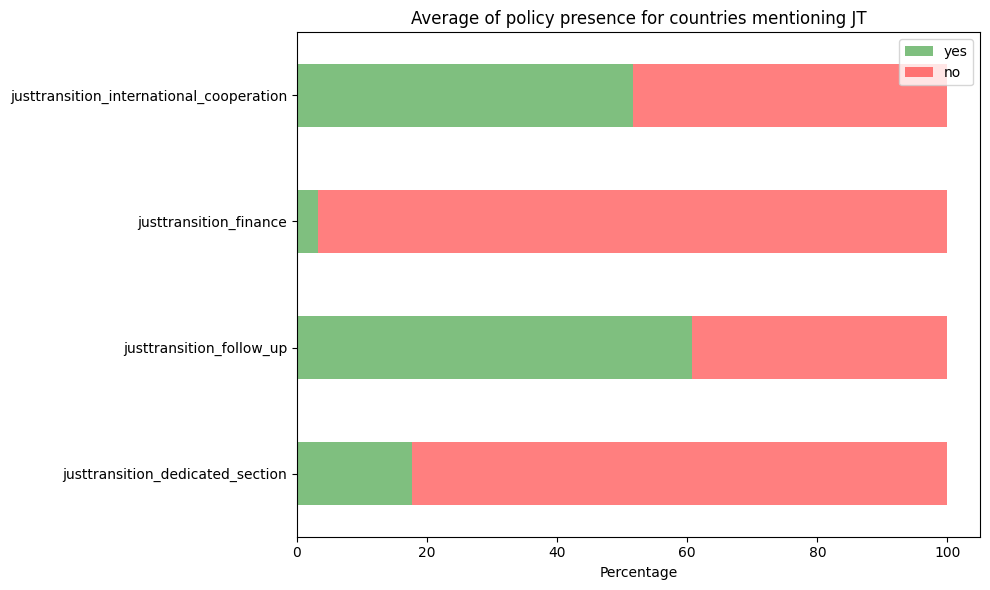

In [17]:
counts_plot = counts_df[::-1].T

ax = counts_plot.plot(kind='barh', stacked=True, figsize=(10, 6), color=['green','red', 'gray'], alpha=0.5)
ax.set_xlabel('Percentage')
ax.set_title("Average of policy presence for countries mentioning JT")
plt.tight_layout()
plt.legend(loc='upper right')
plt.savefig('../fig/jt_depth.pdf', dpi=1000)
plt.show() 

## Open-ended variables

In [18]:
var_open_ended = ['policy_justtransition_enterprise_clean', 'policy_justtransition_industry_sector_clean', 'policy_justtransition_skill_sector_clean', 'policy_justtransition_socprot_clean',  'justtransition_targets_clean', 'policy_justtransition_rights_clean']
df_filtered = ndcs[var_open_ended]

In [19]:
df_filtered.columns = df_filtered.columns.str.replace('policy_justtransition_', '')
df_filtered.columns = df_filtered.columns.str.replace('policy_', '')
df_filtered.columns = df_filtered.columns.str.replace('_clean', '')

df_filtered.rename(columns={'industry_sector': 'Target sector for industrial and sectoral policies', 'skill_sector': 'Target sector for skills policies', 
                          'socprot': 'Social protection', 'justtransition_targets': 'Target groups for JT policies', 'enterprise': 'Enterprise policies', 'rights': 'Rights'}, inplace=True)

/var/folders/2d/tjq3n5693zgf146ztjtxnzr80000gp/T/ipykernel_1378/2929703992.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.rename(columns={'industry_sector': 'Target sector for industrial and sectoral policies', 'skill_sector': 'Target sector for skills policies',


In [21]:
def clean_string(s):
    if isinstance(s, str):
        return re.sub(r"[\[\]']", '', s)
    return s

In [22]:
# Initialize a dictionary to store counts
expression_counts = {}

# Iterate over each column containing strings
for col in df_filtered.columns:
    df_filtered[col] = df_filtered[col].replace(np.nan, 'na')
    
    # Initialize a Counter object to count occurrences
    counts = Counter()
    
    # Iterate over each string in the column
    for string in df_filtered[col]:
        # Split the string by commas and update the counts
        counts.update(clean_string(string).split(', '))
    
    # Store the counts in the dictionary
    expression_counts[col] = counts

# Convert the dictionary to a DataFrame
counts_df = pd.DataFrame(expression_counts).fillna(0).astype(int)

/var/folders/2d/tjq3n5693zgf146ztjtxnzr80000gp/T/ipykernel_1378/3851949520.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[col] = df_filtered[col].replace(np.nan, 'na')


In [23]:
counts_df

,Enterprise policies,Target sector for industrial and sectoral policies,Target sector for skills policies,Social protection,Target groups for JT policies,Rights
support to msmes,49,0,0,0,0,0
enterprise policy measures,32,0,0,0,0,0
entrepreneurship,31,0,0,0,0,0
,11,21,6,4,3,0
no,90,18,43,58,38,103
...,...,...,...,...,...,...
young,0,0,0,0,1,0
pastoral communities,0,0,0,0,1,0
human rights,0,0,0,0,0,90
labor rights,0,0,0,0,0,4


In [24]:
for col, counts in expression_counts.items():
    print(f"Column: {col}")
    sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
    for expression, count in sorted_counts:
        if count > 0:
            print(f"{expression}, Count: {count}")
    print()

Column: Enterprise policies
no, Count: 90
support to msmes, Count: 49
enterprise policy measures, Count: 32
entrepreneurship, Count: 31
supply and value chains, Count: 28
, Count: 11
corporate responsibility, Count: 3
yes, Count: 3
support to msems, Count: 2
enterprise policy measures support to msmes corporate responsibility entrepreneurship, Count: 1
nan, Count: 1
enterprise policy measures support to msmes entrepreneurship, Count: 1
enterpreneurship, Count: 1
public insurance for environmental disasters, Count: 1

Column: Target sector for industrial and sectoral policies
renewable energy, Count: 121
agriculture, Count: 110
water management, Count: 70
forestry, Count: 62
transportation, Count: 61
energy efficiency, Count: 56
waste management, Count: 44
health, Count: 43
construction and building, Count: 35
tourism, Count: 31
, Count: 21
no, Count: 18
fisheries, Count: 15
fossil fuels, Count: 15
fishery, Count: 15
waste management and recycling, Count: 12
manufacturing, Count: 10
ind

### Cleaning of expressions
To do: Consider labor = labour and similar typos/variations

In [25]:
def preprocess_expression(expression):
    # Convert to lowercase
    expression = expression.lower()
    # Remove leading and trailing spaces
    expression = expression.strip()
    # Remove text within parentheses
    expression = re.sub(r'\(.*?\)', '', expression).strip()
    return expression

# Preprocess data
preprocessed_counts = {}
for col, counts in expression_counts.items():
    preprocessed_counts[col] = {}
    for expression, count in counts.items():
        processed_expression = preprocess_expression(expression)
        if processed_expression not in ['na', '']:
            if processed_expression in preprocessed_counts[col]:
                preprocessed_counts[col][processed_expression] += count
            else:
                preprocessed_counts[col][processed_expression] = count

In [26]:
for col, counts in preprocessed_counts.items():
    print(f"Column: {col}")
    sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
    for expression, count in sorted_counts:
        if count > 0:
            print(f"{expression}, Count: {count}")
    print()

Column: Enterprise policies
no, Count: 90
support to msmes, Count: 49
enterprise policy measures, Count: 32
entrepreneurship, Count: 31
supply and value chains, Count: 28
corporate responsibility, Count: 3
yes, Count: 3
support to msems, Count: 2
enterprise policy measures support to msmes corporate responsibility entrepreneurship, Count: 1
nan, Count: 1
enterprise policy measures support to msmes entrepreneurship, Count: 1
enterpreneurship, Count: 1
public insurance for environmental disasters, Count: 1

Column: Target sector for industrial and sectoral policies
renewable energy, Count: 121
agriculture, Count: 110
water management, Count: 70
forestry, Count: 62
transportation, Count: 61
energy efficiency, Count: 56
waste management, Count: 44
health, Count: 43
construction and building, Count: 35
tourism, Count: 31
no, Count: 18
fisheries, Count: 15
fossil fuels, Count: 15
fishery, Count: 15
waste management and recycling, Count: 12
manufacturing, Count: 10
industrial processes, Count

In [27]:
for col, counts in preprocessed_counts.items():
    sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
    expressions = [expression for expression, count in sorted_counts if count > 0]
    count_values = [count for expression, count in sorted_counts if count > 0]
    
    # Create a CSV file with column as the filename
    filename = f"../data/proc/{col}.csv"
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['expressions', 'count_values'])
        for expression, count in zip(expressions, count_values):
            writer.writerow([expression, count])

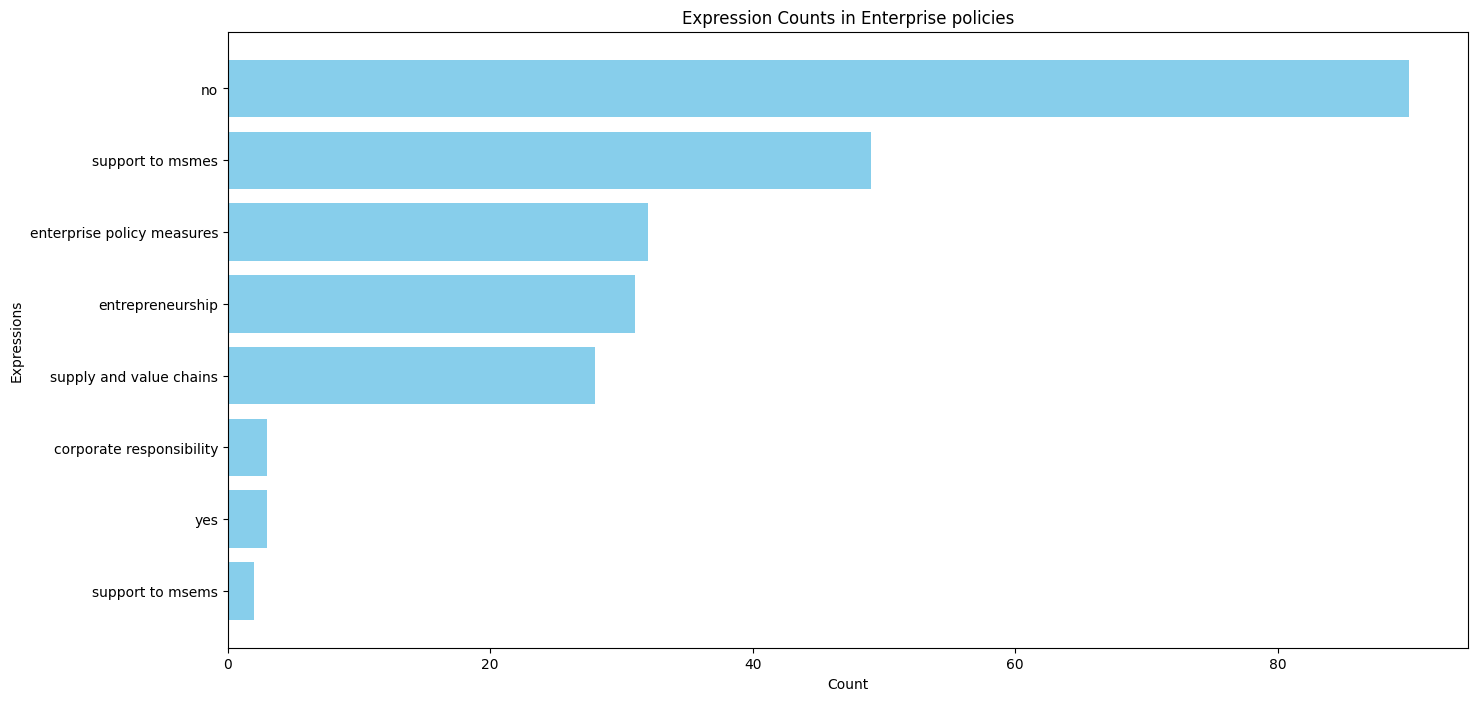

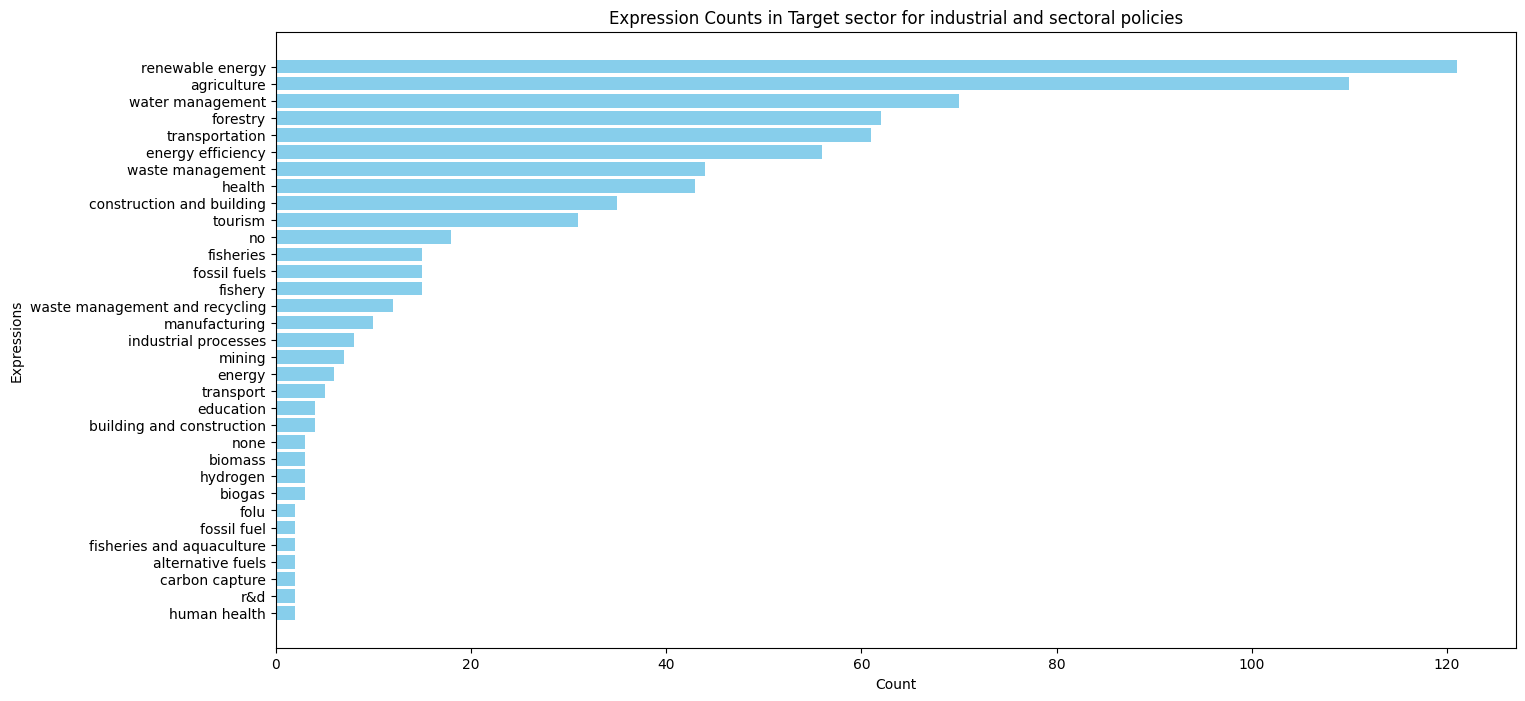

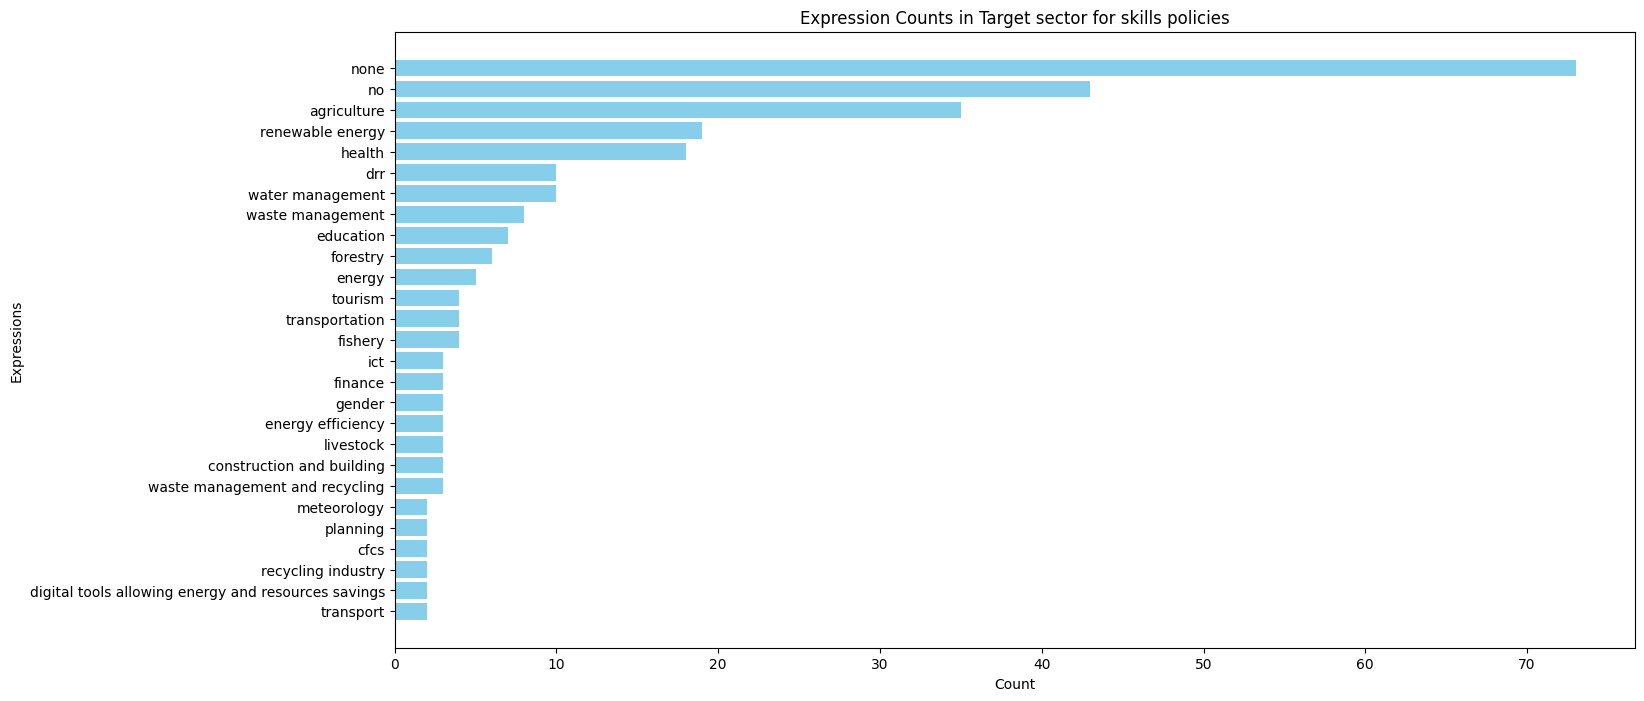

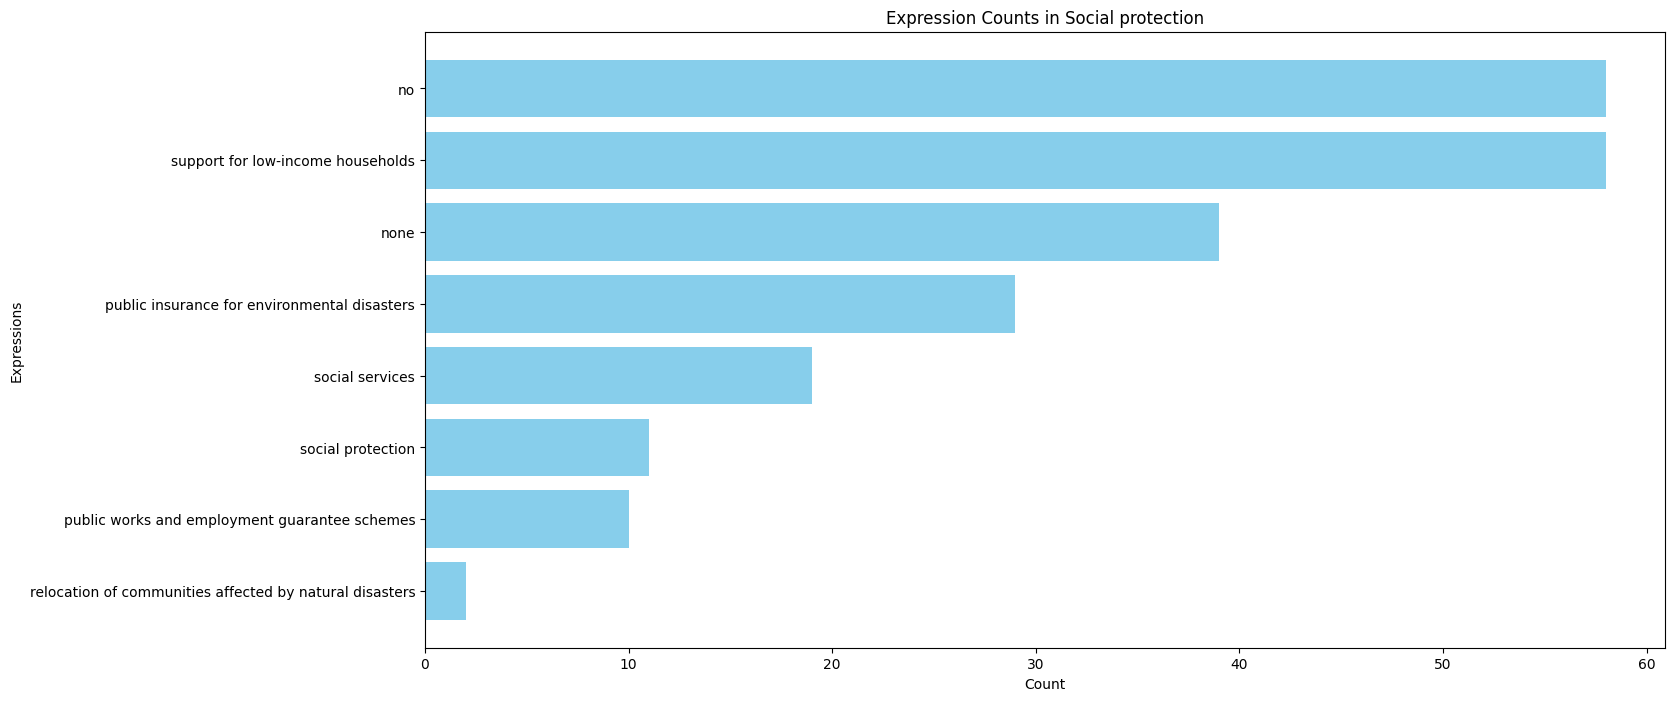

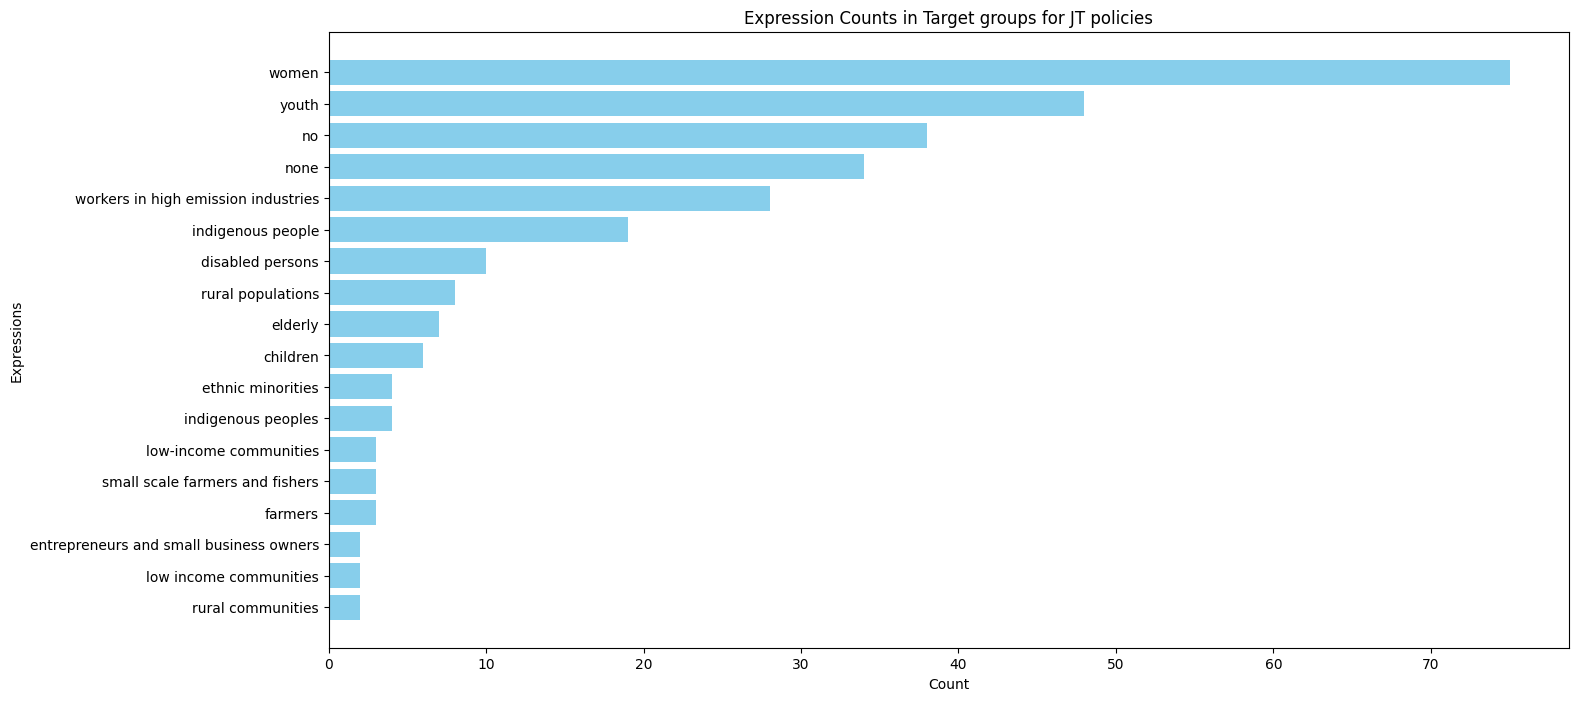

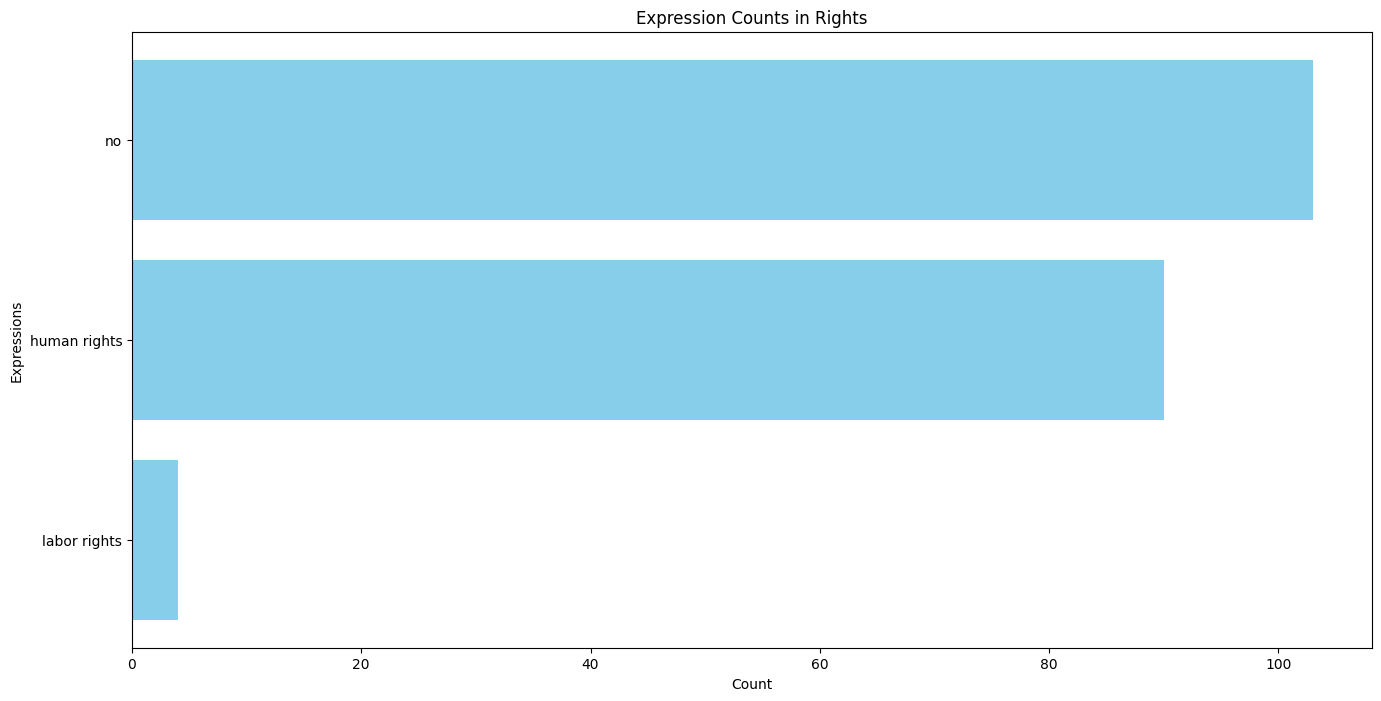

In [28]:
# Plotting the horizontal bar graph
for col, counts in preprocessed_counts.items():
    sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
    expressions = [expression for expression, count in sorted_counts if count > 1]
    count_values = [count for expression, count in sorted_counts if count > 1]

    plt.figure(figsize=(16, 8))
    plt.barh(expressions, count_values, color='skyblue')
    plt.xlabel('Count')
    plt.ylabel('Expressions', fontsize=10)
    plt.title(f'Expression Counts in {col}')
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top
    
    file = col + '.pdf'
    plt.savefig('../fig/' + file, dpi=300)
    
    plt.show()

## Keyword analysis
Source of maps: [Natural Earth Data](https://www.naturalearthdata.com/downloads/110m-cultural-vectors/)

In [93]:
shapefile_path = '../data/ne_10m_admin_0_sovereignty/ne_10m_admin_0_sovereignty.shp' 
world = gpd.read_file(shapefile_path)

df_geo_test = world.merge(ndcs, left_on='SOV_A3', right_on='Code', how='outer')

 Problem: some countries are duplicates because of multiple territories and the codes are different.

In [94]:
print('Different codes for the US:', world[world['SOVEREIGNT'].str.contains('United States')]['SOV_A3'].unique(),',', ndcs[ndcs['countryname'].str.contains('United States')]['Code'].unique())

Different codes for the US: ['US1'] , ['USA']


In [95]:
print("Countries whose codes don't match:", len(df_geo_test[df_geo_test['SOV_A3'].isna()]['Code']))
print(df_geo_test[df_geo_test['SOV_A3'].isna()]['Code'].unique())

Countries whose codes don't match: 18
['AUS' 'CHN' 'CUB' 'DNK' 'FIN' 'FRA' 'GBR' 'ISR' 'KAZ' 'NLD' 'NZL' 'SSD'
 'USA' nan]


In [96]:
print("Countries that don't have a code in the first place:", ndcs[ndcs['Code'].isna()].shape[0])
print(ndcs[ndcs['Code'].isna()]['countryname'].unique())

Countries that don't have a code in the first place: 5
['EU' 'Holy See (Vatican)' 'Palestine' 'Niue' 'Cook Islands']


In [97]:
print(df_geo_test[df_geo_test['Code'].isna()]['SOV_A3'].unique())

['ATA' 'AU1' 'BJN' 'BRI' 'BRT' 'CH1' 'CNM' 'CU1' 'CYN' 'DN1' 'FI1' 'FR1'
 'GB1' 'IRN' 'IS1' 'KA1' 'KAS' 'KOS' 'LBY' 'NL1' 'NZ1' 'PGA' 'SAH' 'SCR'
 'SDS' 'SER' 'SOL' 'SPI' 'TWN' 'US1' 'VAT' 'YEM' nan]


In [98]:
ndcs['SOV_A3'] = ndcs['Code']
ndcs['SOV_A3'] = ndcs['SOV_A3'].replace({'AUS': 'AU1', 'CHN': 'CH1', 'DNK': 'DN1', 'FIN': 'FI1', 'FRA': 'FR1', 'KAZ': 'KA1', 
                                       'GBR': 'GB1', 'USA': 'US1', 'SSD': 'SDS', 'NZL': 'NZ1', 'CUB': 'CU1', 'ISR': 'IS1', 
                                       'NLD': 'NL1'})

world['Code'] = world['SOV_A3']
world['Code'] = world['Code'].replace({'AU1': 'AUS', "CH1": "CHN", 'DN1 ': 'DNK', 'FI1': 'FIN', 'FR1': 'FRA', 'KA1': 'KAZ', 'GB1': 'GBR', 
                                       'US1': 'USA', 'SDS': 'SSD', 'NZ1': 'NZL', 'CU1': 'CUB', 'IS1': 'ISR', 'NL1': 'NLD'})

In [99]:
df_geo = world.merge(ndcs, on='Code', how='left')

In [104]:
# Countries mentionning commitment to just transition in updated NDC submissions
df_geo['Mentions Just Transition'] = df_geo['total_words_justtransition'].apply(lambda x: 'Yes' if x>0 else 'No')

fig_just_transition= px.choropleth(df_geo,
                    locations='Code',
                    color='Mentions Just Transition',
                    hover_name='ADMIN',
                    color_discrete_map={'Yes':'#4682B4', 'No':'lightgray'},
                    projection='natural earth',
                    title='Countries mentionning explicitly a Just Transition')

fig_just_transition.update_geos(
    showframe=False,
    showcoastlines=True,
    projection_type='natural earth',
    visible=True,
    lataxis_dtick=0,
    lonaxis_dtick=0,
    lonaxis_range=[-180, 180], 
    lataxis_range=[-60, 90]   
)

pio.write_image(fig_just_transition, '../fig/kw_just_transition.pdf')
fig_just_transition.show()

In [31]:
world.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)

In [105]:
df_geo['total_words_decent_work'].fillna(0, inplace=True)

fig_decent_work = px.choropleth(df_geo,
                                    locations='Code',
                                    color='total_words_decent_work',
                                    hover_name='ADMIN',  
                                    color_continuous_scale='Blues',
                                    projection='natural earth')

fig_decent_work.update_layout(title="Number of mentions of 'decent work' By Country in Updated NDC Submissions",
                                  geo=dict(showframe=False,
                                           showcoastlines=False,
                                           projection_type='natural earth'))

fig_decent_work.update_geos(
    visible=True,
    lataxis_dtick=0,
    lonaxis_dtick=0,
    lonaxis_range=[-180, 180], 
    lataxis_range=[-60, 90]  
)

pio.write_image(fig_decent_work, '../fig/kw_count_decent_work.pdf')
fig_decent_work.show()

/var/folders/2d/tjq3n5693zgf146ztjtxnzr80000gp/T/ipykernel_52507/156756258.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [107]:
df_geo['total_words_justtransition'].fillna(0, inplace=True)

fig_just_transition_nb = px.choropleth(df_geo,
                                    locations='Code',
                                    color='total_words_justtransition',
                                    hover_name='ADMIN',  
                                    color_continuous_scale='Blues',
                                    projection='natural earth')

fig_just_transition_nb.update_layout(title="Number of mentions of a 'Just Transition' or 'Just Energy Transition' By Country in Updated NDC Submissions",
                                  geo=dict(showframe=False,
                                           showcoastlines=False,
                                           projection_type='natural earth'))

fig_just_transition_nb.update_geos(
    visible=True,
    lataxis_dtick=0,
    lonaxis_dtick=0,
    lonaxis_range=[-180, 180], 
    lataxis_range=[-60, 90]  
)

pio.write_image(fig_just_transition_nb, '../fig/kw_count_just_transition.pdf')
fig_just_transition_nb.show()

/var/folders/2d/tjq3n5693zgf146ztjtxnzr80000gp/T/ipykernel_52507/3696904871.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [34]:
#Pie chart for mentions to just transition, updated NDCs
mentions =  ndcs['total_words_justtransition'].apply(lambda x: 'Yes' if x>0 else 'No')
mention_counts = mentions.value_counts()
fig_pie = px.pie(names=mention_counts.index, values=mention_counts.values, title='Percentage of countries mentioning Just Transition in Updated NDCs')

pio.write_image(fig_pie, '../fig/share_kw_justtransition.pdf')
fig_pie.show()